<a href="https://colab.research.google.com/github/gsidorov/fastai.practice/blob/master/Copia_de_lesson3_camvid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image segmentation with CamVid

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [0]:
path = untar_data(URLs.CAMVID)
path.ls()

[PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images'),
 PosixPath('/root/.fastai/data/camvid/labels')]

In [0]:
cd labels/

/root/.fastai/data/camvid/labels


In [0]:
os.listdir()

['0016E5_08153_P.png',
 '0016E5_06090_P.png',
 '0001TP_009390_P.png',
 '0001TP_009510_P.png',
 '0016E5_00480_P.png',
 '0006R0_f02670_P.png',
 '0016E5_08067_P.png',
 '0006R0_f01770_P.png',
 '0001TP_008280_P.png',
 'Seq05VD_f02520_P.png',
 'Seq05VD_f03330_P.png',
 'Seq05VD_f03000_P.png',
 '0016E5_01770_P.png',
 'Seq05VD_f00960_P.png',
 '0001TP_010380_P.png',
 '0016E5_01800_P.png',
 '0016E5_01020_P.png',
 'Seq05VD_f01080_P.png',
 'Seq05VD_f04200_P.png',
 'Seq05VD_f01440_P.png',
 'Seq05VD_f00780_P.png',
 '0016E5_04410_P.png',
 '0016E5_01740_P.png',
 '0016E5_02250_P.png',
 'Seq05VD_f00300_P.png',
 '0006R0_f02700_P.png',
 '0006R0_f03120_P.png',
 '0006R0_f03270_P.png',
 '0016E5_07800_P.png',
 '0016E5_08055_P.png',
 '0016E5_01140_P.png',
 '0016E5_06390_P.png',
 '0016E5_07969_P.png',
 '0016E5_07680_P.png',
 '0001TP_008850_P.png',
 'Seq05VD_f01140_P.png',
 '0016E5_05640_P.png',
 '0001TP_007500_P.png',
 '0006R0_f01170_P.png',
 '0016E5_04800_P.png',
 'Seq05VD_f02190_P.png',
 'Seq05VD_f01110_P.png'

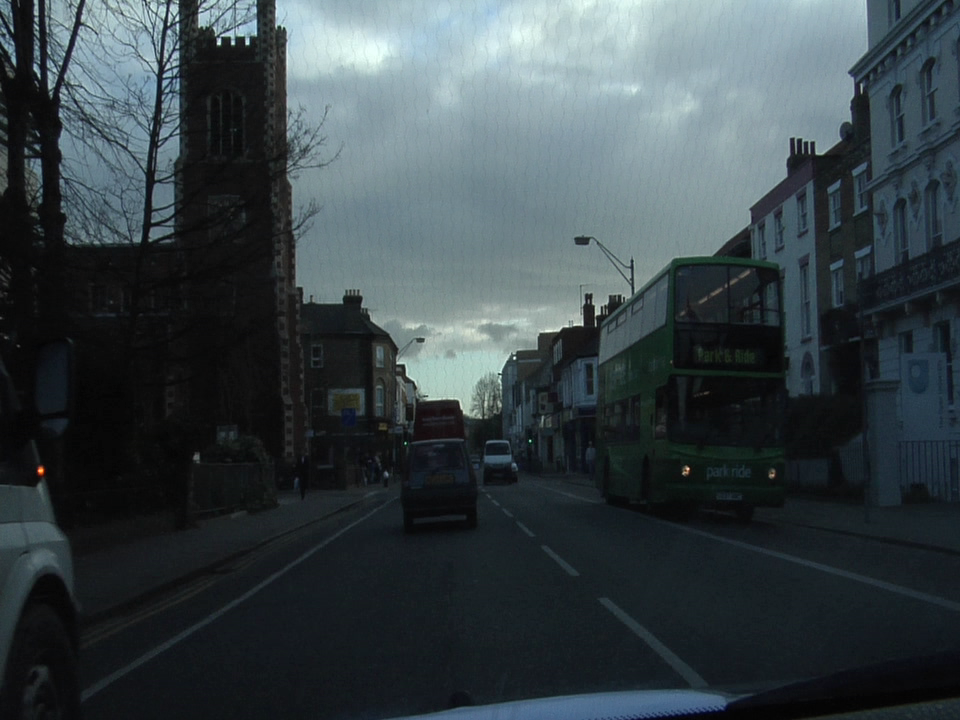

In [0]:
open_image("/root/.fastai/data/camvid/images/0001TP_007560.png")

In [0]:
#notice how the only thing that changes is the cambvid / images -> labels and that every one of the images has a _P at the end.

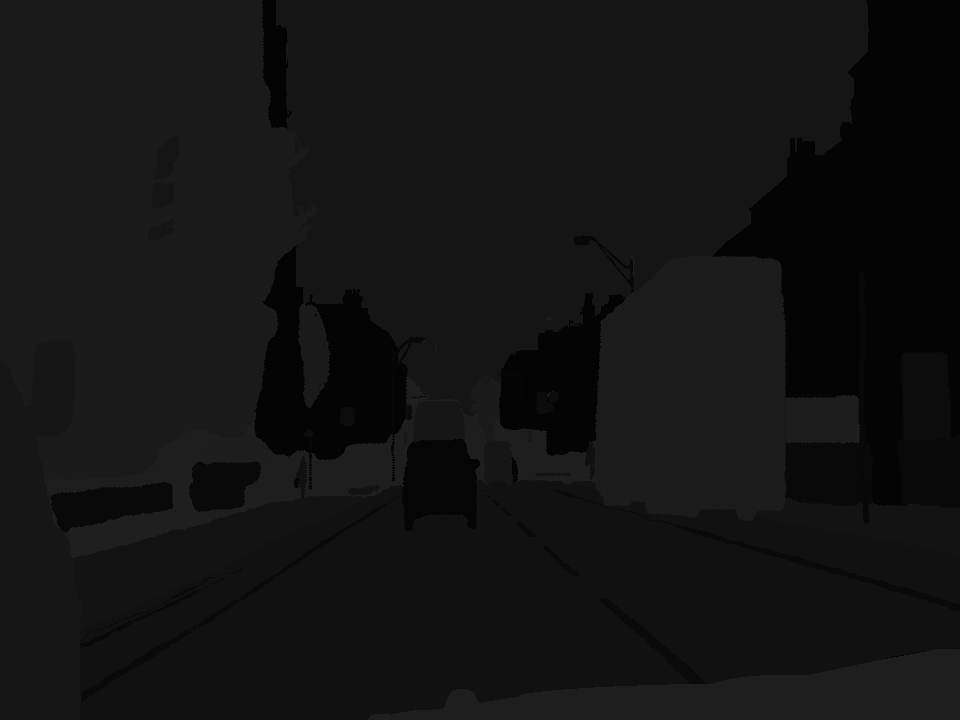

In [0]:
open_image("/root/.fastai/data/camvid/labels/0001TP_007560_P.png")

In [0]:
os.listdir()

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

## Subset classes

In [0]:
# path = Path('./data/camvid-small')

# def get_y_fn(x): return Path(str(x.parent)+'annot')/x.name

# codes = array(['Sky', 'Building', 'Pole', 'Road', 'Sidewalk', 'Tree',
#     'Sign', 'Fence', 'Car', 'Pedestrian', 'Cyclist', 'Void'])

# src = (SegmentationItemList.from_folder(path)
#        .split_by_folder(valid='val')
#        .label_from_func(get_y_fn, classes=codes))

# bs=8
# data = (src.transform(get_transforms(), tfm_y=True)
#         .databunch(bs=bs)
#         .normalize(imagenet_stats))

## Data

In [0]:
fnames = get_image_files(path_img)
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008970.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00540.png')]

In [0]:
fnames

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008970.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_008190.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_00540.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f03000.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05430.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00660.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_007950.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f00630.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07981.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f02760.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07260.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08121.png'),
 PosixPath('/root/.fastai/data/camvid/images/Seq05VD_f04560.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_08550.png'),
 PosixPath('/root/.fastai/data/camvid/images/0001TP_006810.png'),
 PosixPath(

In [0]:
lbl_names = get_image_files(path_lbl)
lbl_names[:3]

[PosixPath('/root/.fastai/data/camvid/labels/0016E5_08153_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0016E5_06090_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_009390_P.png')]

In [0]:
len(fnames)

701

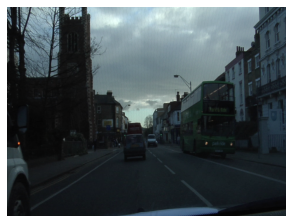

In [0]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

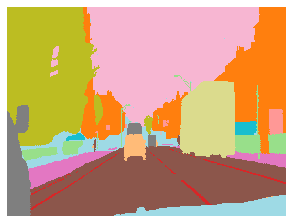

In [0]:
mask = open_mask(get_y_fn(img_f))
mask.show(figsize=(5,5), alpha=1)

In [0]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          [26, 26, 26,  ...,  4,  4,  4],
          ...,
          [22, 22, 22,  ..., 30, 30, 30],
          [22, 22, 22,  ..., 30, 30, 30],
          [22, 22, 22,  ..., 30, 30, 30]]]))

In [0]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

## Datasets

In [0]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=4, have 0MB of GPU RAM free


In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [0]:
#Here please note what would have happened if you do not turn aroud the tfm_y(your painted background classifier), you would not have matching images with predictions
#here, by setting tfm_y = True, we are making the same changes to the input data as well as the output. 

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
#In this show batch, thanks to FastAI lib, the pictures have been overlapped the image and the classification

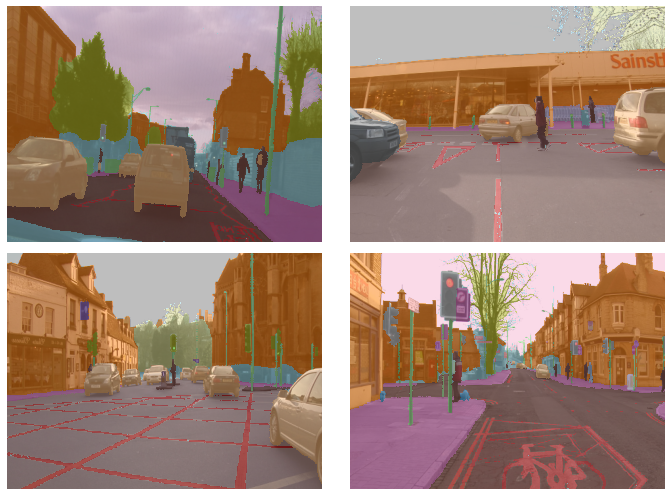

In [0]:
data.show_batch(2, figsize=(10,7))

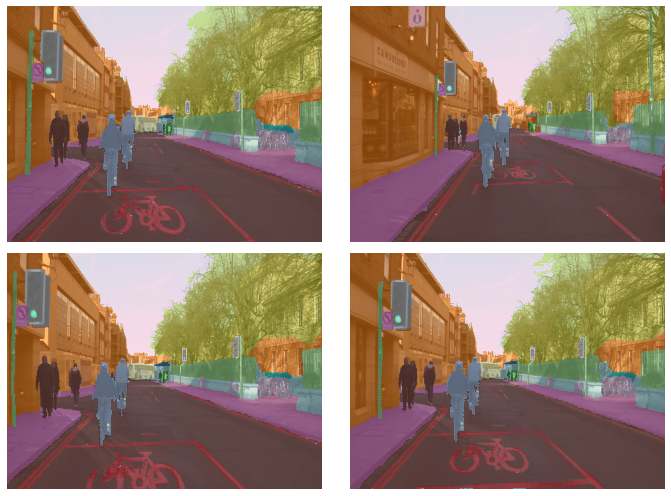

In [0]:
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

## Model

In [0]:
#this a custom accuracy methodology that they had to use in order to follow the paper guidelines. In the paper it was said that for those images wehre the 

In [0]:
#pixels of classified? images was set to 'Void', you do not account it in the accuracy metric

In [0]:
#notice how argmax is almost always (Jeremy calls it classic argmax) use to determine the calculation of results when you are comparing y and yhat pred

In [0]:
#I need to check how to do basic operations in Pytorch, it is mandatory to practice. 

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid
# metrics=accuracy

In [0]:
wd=1e-2

In [0]:
#Very important to know, if you want to create a segmentation model, like we are doing, you are better off going with the unet architecture

In [0]:
#Unets are a type of convolutional net structure, that perform extremely well in segmentation in computer vision with deep learning

![image.png](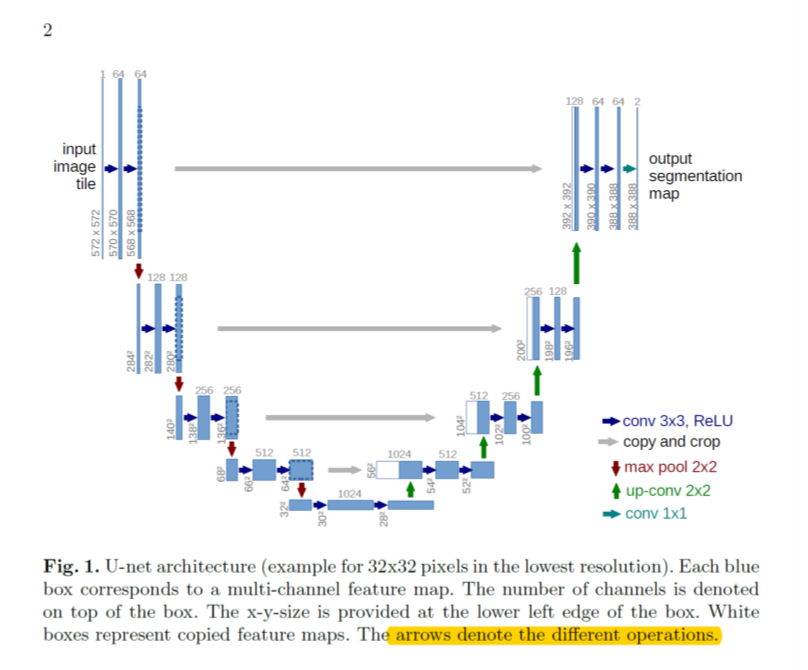+XtPHrMNr8WFg8l1g4GkglsMLDRgDWRYD19tycGxvDj55NQcb1+eguiQH5ztzkMiy41z1z6/+J4Gx54GbjUBibk1/9K9245mgrLawBZ//nq6n+H0cfSciCIZCCHd3Y/i0ronhm2Vl3XUPs3eu47dTgwiFQwiFg+iJ9mNS17AwQVkZ6Zp9lK5nuoHxsZMIh8OpWIhhQtd+ZXMsJP4EbrUAE28Bo7m80IAxkGUxcCuSi6H6XAS9uQh5cxEL5OJyby4Sp/h+f6jPvNMvAFdKgblrHD1Z5u88E5RlgHgzBShAAQosI6CjKIk4MDMO3I4Ct3t5oQFjIJtiQLfDnV5w0d+z6fj+r2OZHgbu3kjuqrnMp6rtb2aCYvsQIAAFKEABClCAAhSgAAWsI8AExTp9wZZQgAIUoAAFKEABClDA9gJMUGwfAgSgAAUoQAEKUIACFKCAdQSYoFinL9gSClCAAhSgAAUoQAEK2F6ACYrtQ4AAFKAABShAAQpQgAIUsI4AExTr9AVbQgEKUIACFKAABShAAdsLMEGxfQgQgAIUoAAFKEABClCAAtYRYIJinb5gSyhAAQpQgAIUoAAFKGB7ASYotg8BAlCAAhSgAAUoQAEKUMA6AkxQrNMXbAkFKEABClCAAhSgAAVsL8AExfYhQAAKUIACFKAABShAAQpYR4AJinX6gi2hAAUoQAEKUIACFKCA7QWYoNg+BAhAAQpQgAIUoAAFKEAB6wgwQbFOX7AlFKAABShAAQpQgAIUsL0AExTbhwABKEABClCAAhSgAAUoYB0BJijW6Qu2hAIUoAAFKEABClCAArYXYIJi+xAgAAUoQAEKUIACFKAABawjwATFOn3BllCAAhSgAAUoQAEKUMD2AkxQbB8CBKAABShAAQpQgAIUoIB1BJigWKcv2BIKUIACFKAABShAAQrYXoAJiu1DgAAUoAAFKEABClCAAhSwjgATFOv0BVtCAQpQgAIUoAAFKEAB2wswQbF9CBCAAhSgAAUoQAEKUIAC1hFggmKdvmBLKEABClCAAhSgAAUoYHuB/5Kg/AWcbiLjtblNNQAAAABJRU5ErkJggg==)

In [0]:
# More on the topic here: https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


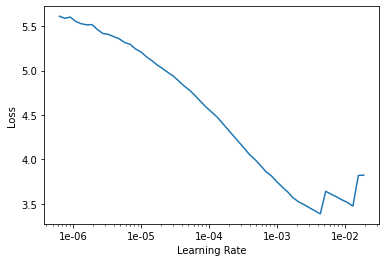

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=3e-3

In [0]:

1+1

2

In [0]:
lr_gleb = 1e-03

In [0]:
learn.fit_one_cycle(10, slice(lr_gleb), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.179193,0.782645,0.815478,1:47:25
1,0.787964,0.619190,0.844609,1:48:38


KeyboardInterrupt: ignored

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid
1,1.172738,0.771233,0.820753
2,0.799105,0.637969,0.825231
3,0.731867,0.628517,0.824456
4,0.630086,0.486045,0.860029
5,0.616145,0.535374,0.860695
6,0.588540,0.439988,0.879501
7,0.551265,0.412592,0.884478
8,0.568172,0.679087,0.832221
9,0.538392,0.405911,0.879605
10,0.451235,0.353972,0.892891


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

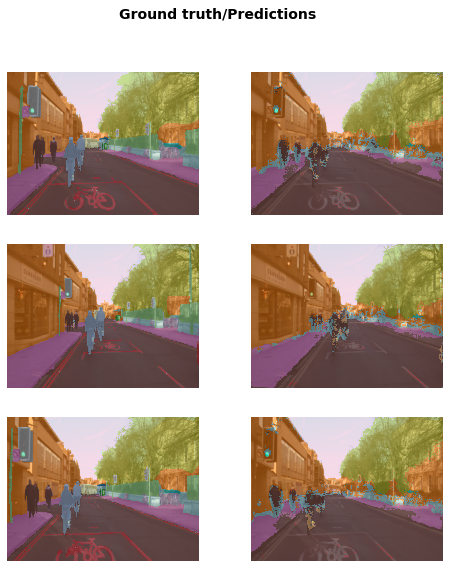

In [0]:
learn.show_results(rows=3, figsize=(8,9))

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4)

In [0]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid
1,0.389135,0.334715,0.896700
2,0.377873,0.324080,0.900284
3,0.369020,0.325073,0.904146
4,0.355022,0.308820,0.912556
5,0.351138,0.313001,0.909351
6,0.347777,0.285509,0.920183
7,0.338683,0.306076,0.909899
8,0.318913,0.303712,0.915792
9,0.312038,0.276126,0.920137
10,0.311217,0.276649,0.925244


In [0]:
learn.save('stage-2');

GO SMALLER - Gleb version into faster calculations using 16 bytes floats.

## Go big

You may have to restart your kernel and come back to this stage if you run out of memory, and may also need to decrease `bs`.

In [0]:
free = gpu_mem_get_free_no_cache()
free

0

In [0]:
learn.destroy()

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [0]:
learn.load('stage-2');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


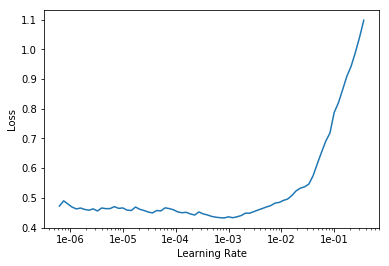

In [0]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=1e-3

In [0]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid
1,0.366140,0.339497,0.908682
2,0.333278,0.304011,0.916702
3,0.326025,0.305404,0.919941
4,0.336885,0.321342,0.910933
5,0.326935,0.305589,0.919401
6,0.347779,0.333608,0.908895
7,0.328334,0.352358,0.905482
8,0.327277,0.387525,0.912187
9,0.291777,0.293065,0.918046
10,0.228348,0.257859,0.929750


In [0]:
learn.save('stage-1-big')

In [0]:
learn.load('stage-1-big');

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(1e-6,lr/10)

In [0]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid
1,0.225999,0.254650,0.930782
2,0.216341,0.256007,0.930751
3,0.209800,0.255649,0.930709
4,0.203509,0.252857,0.931682
5,0.202308,0.258498,0.931308
6,0.200796,0.257311,0.931915
7,0.204560,0.251486,0.933218
8,0.192893,0.254977,0.932786
9,0.189505,0.258091,0.932555
10,0.190156,0.256064,0.933315


In [0]:
learn.save('stage-2-big')

In [0]:
learn.load('stage-2-big');

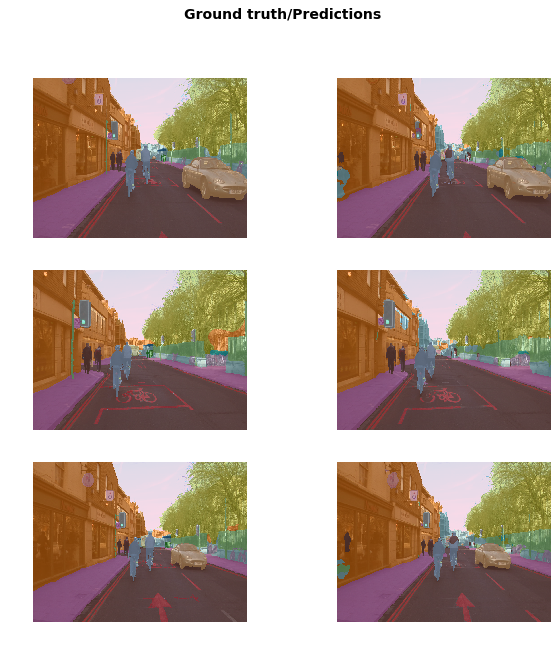

In [0]:
learn.show_results(rows=3, figsize=(10,10))

## fin